# Jupyter: a multi-language architecture for interactive computing

Evan Bianco
[agilegeoscience](http://agilegeoscience.com), [@EvanBianco](http://twitter.com/EvanBianco)

# Why Jupyter?

<center>
*"The purpose of computing is insight, not numbers"*
<p style="margin-left:70%">Hamming '62</p>
</center>
[Jupyter.org](Jupyter.org)

# Everyday exploratory computing, with annotations

Let's plot the Bessel functions $J_i$ for $i=0,3,6,9$:

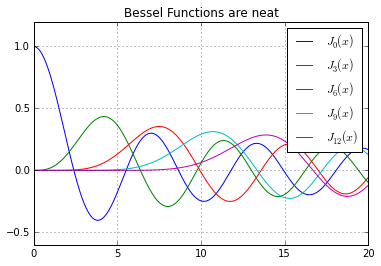

In [9]:
import scipy.special as spec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 20, 200)
for n in range(0,13,3):
    plt.plot(x, spec.jn(n, x), label=r'$J_{%i}(x)$' % n)
plt.grid(); plt.legend(); 
plt.title('Bessel Functions are neat');

# Explore parameters interactively

In [12]:
from ipywidgets import interact

@interact(x=(1, 10))
def f(x):
    print('X is:', x) 

X is: 5


# Displaying results: a rich protocol

In [13]:
from sklearn import datasets
from matplotlib import cm
digits = datasets.load_digits()
n = len(digits.images)

Classif. Label: 8


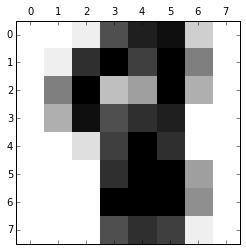

In [15]:
@interact(i=(0,n-1))
def view_image(i):
    print ('Classif. Label:', digits.target[i])
    plt.matshow(digits.images[i], cmap=cm.gray_r)
    plt.show()

# LaTeX and symbolic mathematics support

Make math with markdown:
$$ F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx $$
or with Python:

In [18]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

In [21]:
from sympy import symbols, Eq, factor, init_printing, expand, init_session, latex
init_printing()
x, y = symbols("x y")

In [22]:
eq = ((x+y)**3 * (x+1))
Math((latex(eq)))

<IPython.core.display.Math object>

In [23]:
expanded = Math((latex(expand(eq))))
expanded

<IPython.core.display.Math object>

In [24]:
@interact(n=(1,10))
def _(n):
    eq = ((x+y)**n * (x+1))
    display(Math(latex(eq)))
    display(Math(latex(expand(eq))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
from IPython.display import Audio

max_time = 3; f1 = 250.0; f2 = 251.0; rate = 8000.0; L = 4
times = np.linspace(0,L,rate*L)
phase = 180.0*(np.pi / 180.0)
signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times+phase)

Audio(data=signal, rate=rate)

# Browser multimedia + scientific visualization

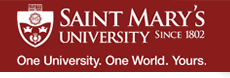

In [9]:
from IPython.display import Image
Image('docs/images/SMU-logo-2.png')

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('9LdVVwUbiX4')

# Display webpages

In [22]:
from IPython.display import IFrame
url = 'http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261'
IFrame(url, width='100%', height=550)

# Sharing notebooks online

In [29]:
url = 'http://nbviewer.ipython.org/urls/gist.githubusercontent.com/ramnathv/9998388/raw/349d6c6756679610cbb78812911f6b15da56e12f/rmaps_leaflet_routing.ipynb'
IFrame(url, width='100%', height=550)

# Customization and multi-language

In [25]:
url = 'http://nbviewer.ipython.org/gist/wrobstory/1eb8cb704a52d18b9ee8/Up%20and%20Down%20PyData%202014.ipynb'
IFrame(url, width='100%', height=550)

# Books: "Literate Computing"

# Other noteworthy works

- Python for Signal Processing, By [Jose Unpingco](https://github.com/unpingco/Python-for-Signal-Processing)

<table>
<tr>

<td>
<ul>
<li><a href="http://link.springer.com/book/10.1007/978-3-319-01342-8/page/1" target=_blank>Springer hardcover</a> book</li>
<li>Each chapter is an IPython Notebook</li>
<li>Posted as a <a href="http://python-for-signal-processing.blogspot.com/">blog entry</a></li>
<li>And all available as a <a href="https://github.com/unpingco/Python-for-Signal-Processing">Github repo</a></li>
</ul>
</td>

<td>
<img src="docs/images/Springer_book.jpg" width="60%">
</td>

</tr>
</table>

- Probabilistic Programming and Bayesian Methods for Hackers, By [Cam Davidson Pilon](http://www.camdp.com).


- [Peter Norvig](http://norvig.com/ipython/)

# JupyterHub: a multi-user server for Jupyter notebooks

By [Jess Hamrick](https://github.com/jhamrick) and others

* [JupyterHub](https://github.com/jhamrick/jupyterhub) - JupyterHub is a multi-user server that manages and proxies multiple instances of the single-user Jupyter notebook server

* [NBGrader](https://github.com/jhamrick/nbgrader) - a system for assigning and grading notebooks

# A gallery of interesting notebooks: 
[http`://ipython.org/gallery](http://ipython.org/gallery)
A protocol that enables kernels in other languages

* [IJulia](http://nbviewer.ipython.org/url/jdj.mit.edu/~stevenj/IJulia%20Preview.ipynb)
* [IHaskell](http://nbviewer.ipython.org/github/gibiansky/IHaskell/blob/master/demo/IHaskell.ipynb)
* [IFSharp](http://nbviewer.ipython.org/github/BayardRock/IfSharp/blob/master/Feature%20Notebook.ipynb)
* [IRuby](http://nbviewer.ipython.org/github/minad/iruby/blob/master/IRuby-Example.ipynb)
* [IGo](https://github.com/takluyver/igo)
* [IScala](https://github.com/mattpap/IScala)

The interactive widget architecture is also 100% language-agnostic

# Convert your notebook to html

[Instructions on how to use nbconvert](https://github.com/jupyter/nbconvert)

# Parallel computation

[Install and instructions](https://github.com/ipython/ipyparallel)

In [2]:
import os
import ipyparallel as ipp

rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()